## Estadística aplicada
Sesión 9- 12 septiembre

Francisco Javier Chávez Hernández 2034204 gpo 43

In [3]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install seaborn

In [21]:
# librerías especializadas
from lifelines import KaplanMeierFitter, ExponentialFitter, WeibullFitter, LogNormalFitter, CoxPHFitter
import seaborn as sns

In [22]:
#Datos
df_cancer=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/cancer.csv')

In [26]:
df_cancer.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,1,74,0,1.0,90.0,100.0,1175.0,NaN
1,455,1,68,0,0.0,90.0,90.0,1225.0,15.0
2,1010,0,56,0,0.0,90.0,90.0,NaN,15.0
3,210,1,57,0,1.0,90.0,60.0,1150.0,11.0
4,883,1,60,0,0.0,100.0,90.0,NaN,0.0


Los datos constan de 228 observaciones y 10 variables/columnas. La descripción de las variables es la siguiente:
inst: código de institución\
**time (d1)**: tiempo de supervivencia en días\
**status (d2)**: estado de censura 1 = censurado, 2 = muerto\
**age (i1)**: Edad en años\
**sex (i2)**: Masculino = 1 Femenino = 2\
**ph.ecog (i3)**: puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama <50% del día, 3 = en cama > 50% del día pero no encamado, 4 = encamado\
**ph.karno (i4)**: puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico\
**pat.karno (i4)**: puntuación de rendimiento de Karnofsky según la calificación del paciente\
**meal.cal (i5)**: Calorías consumidas en las comidas\
**wt.loss (i6)**: Pérdida de peso en los últimos seis meses.

In [24]:
#3 Estadísticas descriptivas
df_cancer['status']=df_cancer['status']-1
df_cancer['sex']=df_cancer['sex']-1
# status 0=censurado ,1=muerto
#sex= 0=Hombre ,1=mujer

In [25]:
#eliminar variable "inst"
df_cancer=df_cancer.drop('inst', axis=1)

In [27]:
#verificar que sean numéricas para poder utilizarlas
df_cancer.dtypes

time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [28]:
#verificar cuantos missing values (valores perdidos)
df_cancer.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

In [29]:
#eliminar/imputar datos
#estadisticas descriptivas
df_cancer.describe()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,305.232456,0.723684,62.447368,0.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,5.000000,0.000000,39.000000,0.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,166.750000,0.000000,56.000000,0.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,255.500000,1.000000,63.000000,0.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,396.500000,1.000000,69.000000,1.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,1022.000000,1.000000,82.000000,1.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


In [30]:
df_cancer['status'].value_counts()

status
1    165
0     63
Name: count, dtype: int64

El 72% de los individuos fallecieron, el 39% son mujeres, la edad promedio de los sujetos es de 62.44, el individuo más joven tiene 39 y el mayor tiene 82.

<function matplotlib.pyplot.show(close=None, block=None)>

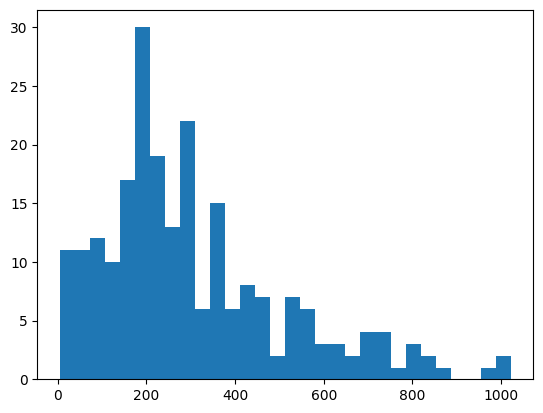

In [31]:
#Distribución de T
plt.hist(df_cancer['time'], bins=30)
plt.show

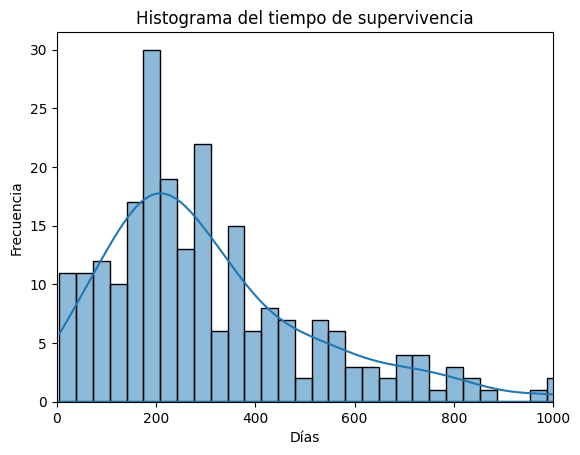

In [41]:
#histograma
sns.histplot(df_cancer['time'],bins=30, kde=True)
## añadir curva de distribución
sns.kdeplot(df_cancer['time'])
plt.xlim(0,1000)
plt.title('Histograma del tiempo de supervivencia')
plt.xlabel('Días')
plt.ylabel('Frecuencia');

In [42]:
#Estimación del modelo